# Here is an implementation of KNN in an image compression example.

It takes an image and compresses it in the sense that you only need the mean of the specified clusters and the labels for each pixel. If you for example take the image of a lollipop and find two clusters, it will compress the image into an image with the same shape but only two colors. It will basically reduce the file size of an image by removing a certain amount of colors.

Note: This is using my own code for KNN, so it is much less efficient than the one already existing in sklearn.

In [1]:
%%capture
#'import' the methods from the k-means notebook (yes it is inefficient)
%run K-means.ipynb

In [2]:
##Imports
from skimage import io
import os
import warnings; warnings.simplefilter('ignore')

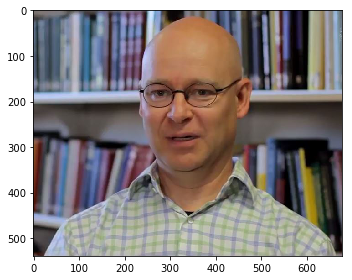

In [12]:
#load image
imgName = 'TET.jpg'
image = io.imread(imgName);
io.imshow(image);
io.show();

#save the image size
vertical = image.shape[0];
horizontal = image.shape[1];

#change into big matrix with each row being a pixel and each column being RGB value
imgShaped = image.reshape(vertical*horizontal,3)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:04<00:00,  1.30s/it]


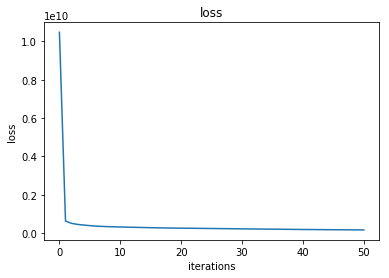

In [28]:
#Learning k-means
clusters = 30;
dim = 3;
spread = 300;
meanInit = getInitialMeanGuesses(dim=3,meanSpread=spread,nrOfClusters=clusters)

#does the learning
newMean,J=KNN(imgShaped,meanInit,tolerance=0.01,maxIter=50)
#gives each pixel a label
labelPixels = (findClosestCluster(imgShaped,newMean))

#Save them for size comparison
io.imsave('labeledPixels.jpg',(labelPixels.reshape(vertical,horizontal)).astype(np.uint8))
np.save('clusterMeans.npy',newMean) 

pb.plot(J)
pb.title("loss")
pb.xlabel("iterations")
pb.ylabel("loss")
pb.show()

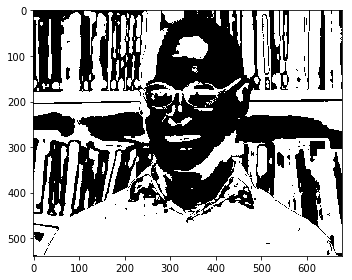

In [18]:
##PLotting black and white, works best if only 2 clusters (since it's only 2 colors)

labelPixels = labelPixels.astype(np.uint8)
labeledImage = (imgShaped*labelPixels);

#set all nonzero terms to white
labeledImage[np.sum(labeledImage,1)>0]=[255,255,255]

labeledImage = labeledImage.reshape(vertical,horizontal,3)

io.imshow(labeledImage)
io.show()

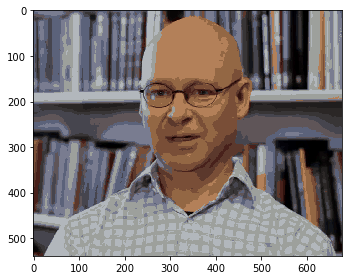

In [29]:
## plots in different colors, one for each cluster.
reconstructedImage = np.zeros((vertical,horizontal,3));

labelPixels = labelPixels;
labelPixels = labelPixels.reshape(vertical,horizontal);


for i in range(vertical):
    for j in range(horizontal):
        reconstructedImage[i,j,:] = newMean[labelPixels[i,j],:]

io.imshow(reconstructedImage.astype(np.uint8));
io.imsave('reconstructedImage.jpg',reconstructedImage.astype(np.uint8))
io.show()

# Below you can check the difference in file size of the original and the compressed image.

In [30]:
originalSize = os.path.getsize(imgName)
reconstructedSize = os.path.getsize("reconstructedImage.jpg")
compressedSize = os.path.getsize("labeledPixels.jpg")+os.path.getsize("clusterMeans.npy")

printList = [originalSize,reconstructedSize,compressedSize];

print("      Orignal size: " + repr(originalSize) + " b")
print("Reconstructed size: " + repr(reconstructedSize) + " b")
print("   Compressed size: " + repr(compressedSize) + " b")


      Orignal size: 52559 b
Reconstructed size: 51695 b
   Compressed size: 16882 b
